### NOTEBOOK CONTENTS

- plots of how much of the domain is $\Omega_A$ undersaturated at various thresholds in the BR and PI runs.

- would it be worth it to see how much is undersaturated, not including river areas (it won't matter too much...)?

#### Production of .pkl documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt



In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [33]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import pickle

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




In [34]:
BR_under_0pt5_vol = pickle.load(open('./domain_undersat_pickles/BR_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('./domain_undersat_pickles/BR_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('./domain_undersat_pickles//BR_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('./domain_undersat_pickles//BR_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('./domain_undersat_pickles//BR_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('./domain_undersat_pickles//BR_under_1pt5_vol.pkl', 'rb')) 

PI_under_0pt5_vol = pickle.load(open('./domain_undersat_pickles/PI_under_0pt5_vol.pkl', 'rb'))   
PI_under_0pt6_vol = pickle.load(open('./domain_undersat_pickles/PI_under_0pt6_vol.pkl', 'rb'))   
PI_under_0pt7_vol = pickle.load(open('./domain_undersat_pickles//PI_under_0pt7_vol.pkl', 'rb'))   
PI_under_0pt8_vol = pickle.load(open('./domain_undersat_pickles//PI_under_0pt8_vol.pkl', 'rb'))   
PI_under_0pt9_vol = pickle.load(open('./domain_undersat_pickles//PI_under_0pt9_vol.pkl', 'rb'))   
PI_under_1pt0_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt0_vol.pkl', 'rb'))   
PI_under_1pt1_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt1_vol.pkl', 'rb'))   
PI_under_1pt2_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt2_vol.pkl', 'rb'))   
PI_under_1pt3_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt3_vol.pkl', 'rb'))   
PI_under_1pt4_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt4_vol.pkl', 'rb'))   
PI_under_1pt5_vol = pickle.load(open('./domain_undersat_pickles//PI_under_1pt5_vol.pkl', 'rb'))   

In [35]:
BR_under_0pt5 = pickle.load(open('./domain_undersat_pickles/BR_under_0pt5.pkl', 'rb'))   
BR_under_0pt7 = pickle.load(open('./domain_undersat_pickles//BR_under_0pt7.pkl', 'rb'))   
BR_under_1pt0 = pickle.load(open('./domain_undersat_pickles//BR_under_1.pkl', 'rb'))   
BR_under_1pt3 = pickle.load(open('./domain_undersat_pickles//BR_under_1pt3.pkl', 'rb'))   
BR_under_1pt5 = pickle.load(open('./domain_undersat_pickles//BR_under_1pt5.pkl', 'rb')) 

PI_under_0pt5 = pickle.load(open('./domain_undersat_pickles/PI_under_0pt5.pkl', 'rb'))   
PI_under_0pt7 = pickle.load(open('./domain_undersat_pickles//PI_under_0pt7.pkl', 'rb'))   
PI_under_1pt0 = pickle.load(open('./domain_undersat_pickles//PI_under_1.pkl', 'rb'))   
PI_under_1pt3 = pickle.load(open('./domain_undersat_pickles//PI_under_1pt3.pkl', 'rb'))   
PI_under_1pt5 = pickle.load(open('./domain_undersat_pickles//PI_under_1pt5.pkl', 'rb'))   

Text(0.5, 0, 'days')

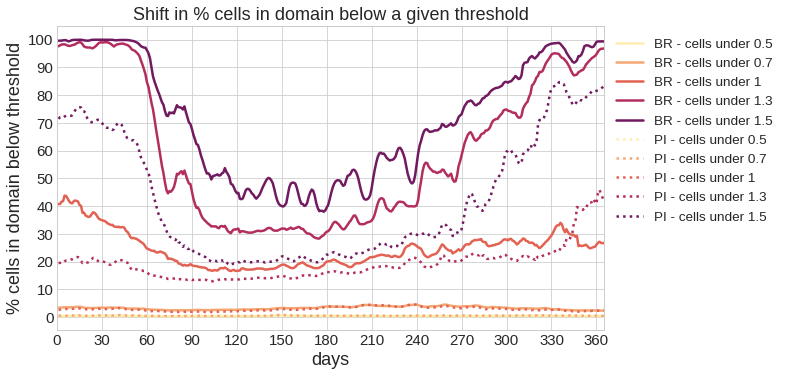

In [36]:
days = np.arange(1,366,1)
tcm = cm.cm.matter

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,BR_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,BR_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,BR_under_1pt0*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1')
ax1.plot(days,BR_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,BR_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.plot(days,PI_under_0pt5*100,\
        color = tcm(1.*0/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.plot(days,PI_under_0pt7*100,\
        color = tcm(1.*1/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.plot(days,PI_under_1pt0*100,\
        color = tcm(1.*2/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1')
ax1.plot(days,PI_under_1pt3*100,\
        color = tcm(1.*3/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.plot(days,PI_under_1pt5*100,\
        color = tcm(1.*4/5),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1, 1], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% cells in domain below threshold', fontsize = 18)
ax1.set_title('Shift in % cells in domain below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

Text(0.5, 0, 'days')

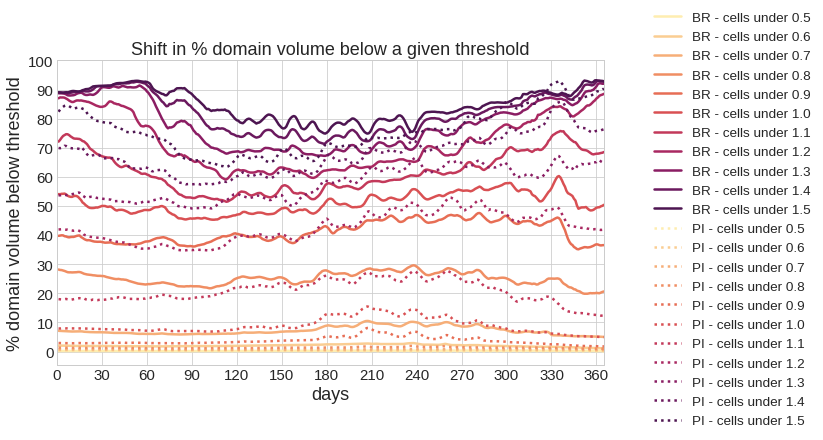

In [37]:
days = np.arange(1,366,1)
tcm = cm.cm.matter

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,BR_under_0pt6_vol*100,\
        color = tcm(1.*1/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.6')
ax1.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,BR_under_0pt8_vol*100,\
        color = tcm(1.*3/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.8')
ax1.plot(days,BR_under_0pt9_vol*100,\
        color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
ax1.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,BR_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
ax1.plot(days,BR_under_1pt2_vol*100,\
        color = tcm(1.*7/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.2')
ax1.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,BR_under_1pt4_vol*100,\
        color = tcm(1.*9/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.4')
ax1.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.plot(days,PI_under_0pt6_vol*100,\
        color = tcm(1.*1/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.6')
ax1.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.plot(days,PI_under_0pt8_vol*100,\
        color = tcm(1.*3/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.8')
ax1.plot(days,PI_under_0pt9_vol*100,\
        color = tcm(1.*4/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.9')
ax1.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
ax1.plot(days,PI_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.1')
ax1.plot(days,PI_under_1pt2_vol*100,\
        color = tcm(1.*7/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.2')
ax1.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.plot(days,PI_under_1pt4_vol*100,\
        color = tcm(1.*9/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.4')
ax1.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')


ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.4, 1.2], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

Text(0.5, 0, 'days')

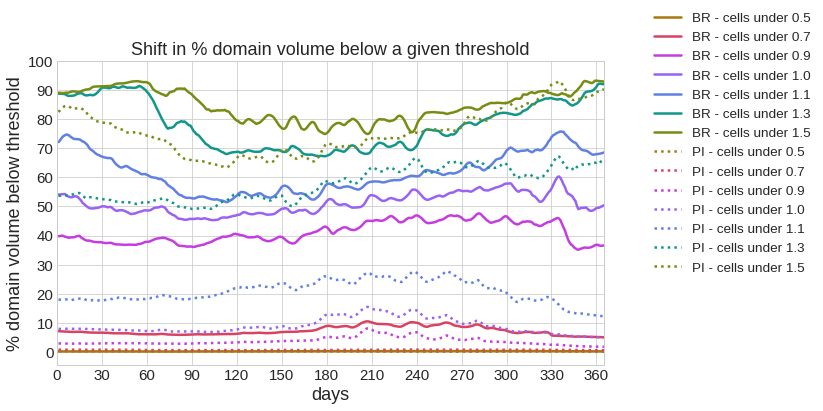

In [38]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
# ax1.plot(days,BR_under_0pt6_vol*100,\
#         color = tcm(1.*1/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.6')
ax1.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
# ax1.plot(days,BR_under_0pt8_vol*100,\
#         color = tcm(1.*3/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.8')
ax1.plot(days,BR_under_0pt9_vol*100,\
        color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
ax1.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,BR_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
# ax1.plot(days,BR_under_1pt2_vol*100,\
#         color = tcm(1.*7/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.2')
ax1.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
# ax1.plot(days,BR_under_1pt4_vol*100,\
#         color = tcm(1.*9/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.4')
ax1.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
# ax1.plot(days,PI_under_0pt6_vol*100,\
#         color = tcm(1.*1/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.6')
ax1.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
# ax1.plot(days,PI_under_0pt8_vol*100,\
#         color = tcm(1.*3/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.8')
ax1.plot(days,PI_under_0pt9_vol*100,\
         color = tcm(1.*4/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.9')
ax1.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
ax1.plot(days,PI_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.1')
# ax1.plot(days,PI_under_1pt2_vol*100,\
#        color = tcm(1.*7/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.2')
ax1.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
# ax1.plot(days,PI_under_1pt4_vol*100,\
#         color = tcm(1.*9/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.4')
ax1.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')


ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.4, 1.2], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

Text(0.5, 0, 'days')

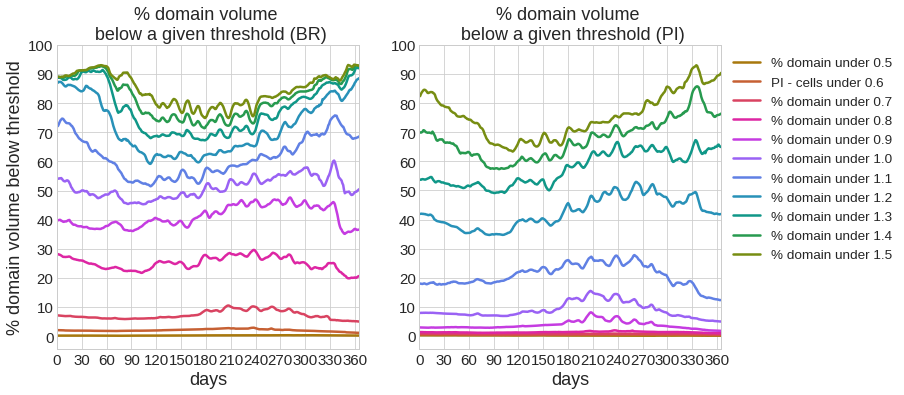

In [39]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,2,1)


ax1.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,BR_under_0pt6_vol*100,\
        color = tcm(1.*1/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.6')
ax1.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,BR_under_0pt8_vol*100,\
        color = tcm(1.*3/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.8')
ax1.plot(days,BR_under_0pt9_vol*100,\
        color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
ax1.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,BR_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
ax1.plot(days,BR_under_1pt2_vol*100,\
        color = tcm(1.*7/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.2')
ax1.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,BR_under_1pt4_vol*100,\
        color = tcm(1.*9/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.4')
ax1.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.tick_params(axis='both', which='major', labelsize=15)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('% domain volume \n below a given threshold (BR)', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

ax1 = fig.add_subplot(1,2,2)
ax1.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '% domain under 0.5')
ax1.plot(days,PI_under_0pt6_vol*100,\
        color = tcm(1.*1/11),linewidth = lw, linestyle = '-', label = 'PI - cells under 0.6')
ax1.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '% domain under 0.7')
ax1.plot(days,PI_under_0pt8_vol*100,\
        color = tcm(1.*3/11),linewidth = lw, linestyle = '-', label = '% domain under 0.8')
ax1.plot(days,PI_under_0pt9_vol*100,\
         color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = '% domain under 0.9')
ax1.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '% domain under 1.0')
ax1.plot(days,PI_under_1pt1_vol*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = '% domain under 1.1')
ax1.plot(days,PI_under_1pt2_vol*100,\
       color = tcm(1.*7/11),linewidth = lw, linestyle = '-', label = '% domain under 1.2')
ax1.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '% domain under 1.3')
ax1.plot(days,PI_under_1pt4_vol*100,\
        color = tcm(1.*9/11),linewidth = lw, linestyle = '-', label = '% domain under 1.4')
ax1.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '% domain under 1.5')


ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.0, 1.0], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
#ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('% domain volume \n below a given threshold (PI)', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

## fill between thresholding lines, to visualize volume lost

Text(0.5, 0, 'days')

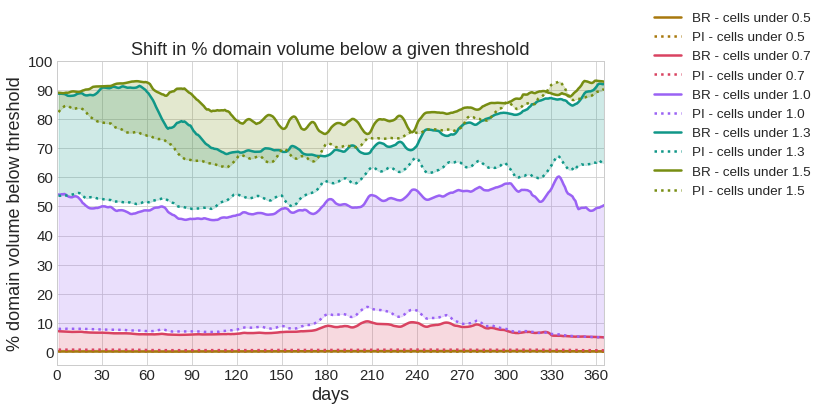

In [40]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )

ax1.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )

# ax1.plot(days,BR_under_0pt9_vol*100,\
#         color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
# ax1.plot(days,PI_under_0pt9_vol*100,\
#          color = tcm(1.*4/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.9')
# ax1.fill_between(days, BR_under_0pt9_vol*100, PI_under_0pt9_vol*100, \
#                  color = tcm(1.*4/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
ax1.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

# ax1.plot(days,BR_under_1pt1_vol*100,\
#         color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
# ax1.plot(days,PI_under_1pt1_vol*100,\
#         color = tcm(1.*6/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.1')
# ax1.fill_between(days, BR_under_1pt1_vol*100, PI_under_1pt1_vol*100, \
#                  color = tcm(1.*6/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')
ax1.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')
ax1.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.4, 1.2], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)

Text(0.5, 0, 'days')

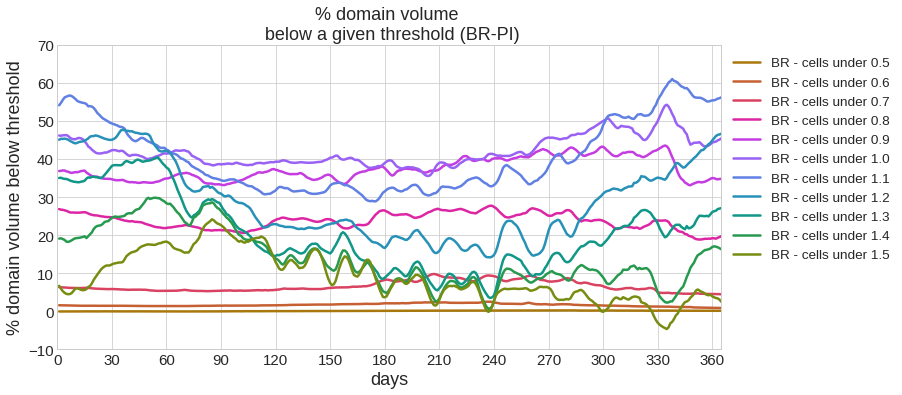

In [41]:
days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(days,(BR_under_0pt5_vol-PI_under_0pt5_vol)*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,(BR_under_0pt6_vol-PI_under_0pt6_vol)*100,\
        color = tcm(1.*1/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.6')
ax1.plot(days,(BR_under_0pt7_vol-PI_under_0pt7_vol)*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,(BR_under_0pt8_vol-PI_under_0pt8_vol)*100,\
        color = tcm(1.*3/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.8')
ax1.plot(days,(BR_under_0pt9_vol-PI_under_0pt9_vol)*100,\
        color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
ax1.plot(days,(BR_under_1pt0_vol-PI_under_1pt0_vol)*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,(BR_under_1pt1_vol-PI_under_1pt1_vol)*100,\
        color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
ax1.plot(days,(BR_under_1pt2_vol-PI_under_1pt2_vol)*100,\
        color = tcm(1.*7/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.2')
ax1.plot(days,(BR_under_1pt3_vol-PI_under_1pt3_vol)*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,(BR_under_1pt4_vol-PI_under_1pt4_vol)*100,\
        color = tcm(1.*9/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.4')
ax1.plot(days,(BR_under_1pt5_vol-PI_under_1pt5_vol)*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')

ax1.tick_params(axis='both', which='major', labelsize=15)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('% domain volume \n below a given threshold (BR)', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)



ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.0, 1.0], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_ylim(-10,70)
w = ax1.set_yticks(np.arange(-10, 80, step=10))
#ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('% domain volume \n below a given threshold (BR-PI)', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)